Treinando modelo para Rádio...


c:\Users\Inteli\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Inteli\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Inteli\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Inteli\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

Mean Absolute Error (MAE): 159617.22
Root Mean Squared Error (RMSE): 189524.55
Mean Absolute Percentage Error (MAPE): 12.51%
R-squared (R²): 0.57


C:\Users\Inteli\AppData\Local\Temp\ipykernel_336\1571524062.py:65: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=test_y.index[-1] + pd.DateOffset(months=1), periods=future_steps, freq='M')


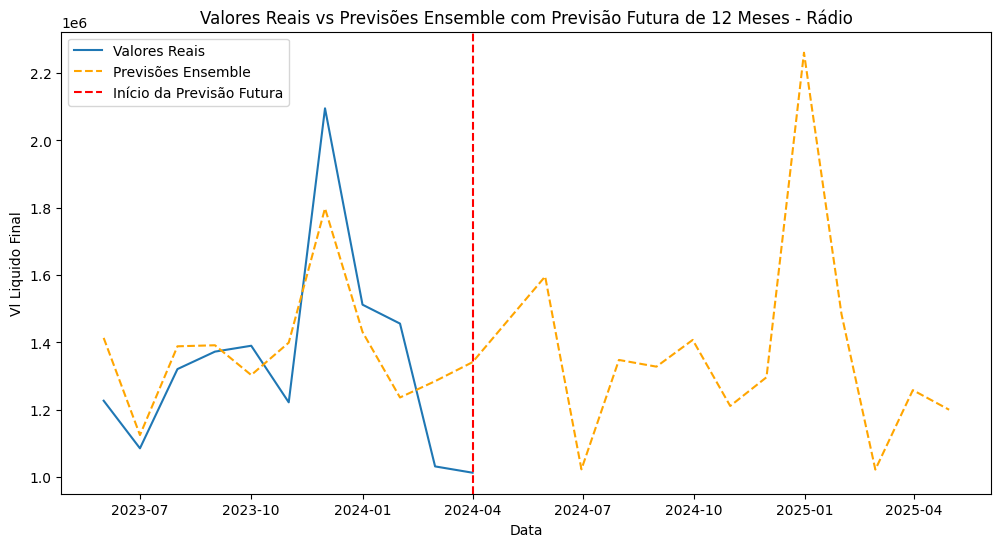

c:\Users\Inteli\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Inteli\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Inteli\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Treinando modelo para Digital...


c:\Users\Inteli\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Inteli\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Inteli\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Inteli\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Inteli\AppData\

Mean Absolute Error (MAE): 1157006.14
Root Mean Squared Error (RMSE): 1327916.37
Mean Absolute Percentage Error (MAPE): 105.37%
R-squared (R²): -7.51


C:\Users\Inteli\AppData\Local\Temp\ipykernel_336\1571524062.py:65: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=test_y.index[-1] + pd.DateOffset(months=1), periods=future_steps, freq='M')


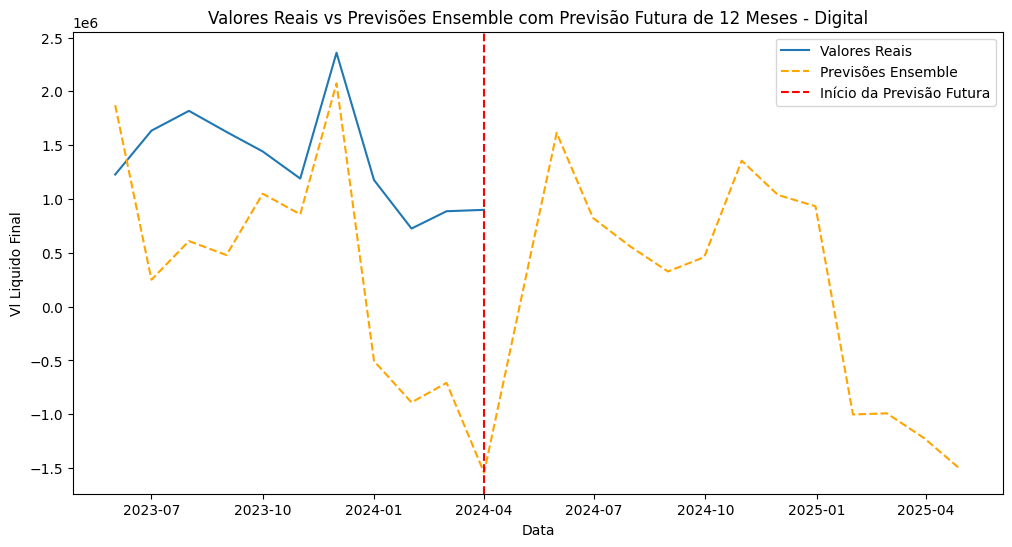

Treinando modelo para Televisão...


c:\Users\Inteli\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Inteli\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Inteli\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
c:\Users\Inteli\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

Mean Absolute Error (MAE): 1158284.77
Root Mean Squared Error (RMSE): 1460858.66
Mean Absolute Percentage Error (MAPE): 17.89%
R-squared (R²): -0.25


C:\Users\Inteli\AppData\Local\Temp\ipykernel_336\1571524062.py:65: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=test_y.index[-1] + pd.DateOffset(months=1), periods=future_steps, freq='M')


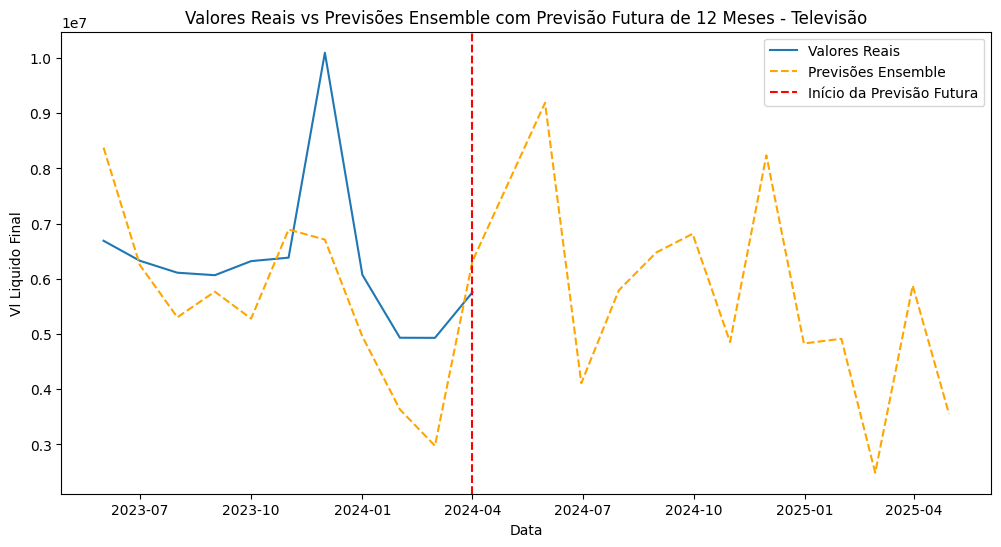

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Carregar os DataFrames
df_geral_radio = pd.read_csv('../df_geral_radio.csv')
df_geral_digital = pd.read_csv('../df_geral_digital.csv')
df_geral_televisao = pd.read_csv('../df_geral_televisao.csv')

# Lista de DataFrames
dataframes = [df_geral_radio, df_geral_digital, df_geral_televisao]

# Loop para ajustar o índice e converter PeriodIndex para Timestamp, se necessário
for df in dataframes:
    # Define a coluna 'Data' como índice
    df.set_index('Data', inplace=True)
    
    # Converte PeriodIndex para Timestamp se for o caso
    if isinstance(df.index, pd.PeriodIndex):
        df.index = df.index.to_timestamp()
    else:
        df.index = pd.to_datetime(df.index)

# Função para treinar e avaliar o modelo SARIMAX
def train_and_evaluate_sarimax(df, name):
    print(f"Treinando modelo para {name}...")

    # Verifique se há valores ausentes e preencha ou remova-os
    df = df.dropna()

    # Converta todas as colunas para tipos numéricos, se necessário
    df = df.apply(pd.to_numeric, errors='coerce')

    # Selecione as features (todas as colunas menos 'Vl Liquido Final', 'VL Tabela', 'Vl Bruto')
    X = df.drop(columns=['Vl Liquido Final', 'Vl Bruto', 'VL Tabela'])
    y = df['Vl Liquido Final']

    # Divida os dados em treinamento e teste
    train_size = int(len(y) * 0.8)
    train_X, test_X = X[:train_size], X[train_size:]
    train_y, test_y = y[:train_size], y[train_size:]

    # Treinando múltiplos modelos SARIMAX com diferentes parâmetros
    model_1 = SARIMAX(train_y, exog=train_X, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
    model_1_fit = model_1.fit(disp=False)

    model_2 = SARIMAX(train_y, exog=train_X, order=(2, 1, 2), seasonal_order=(1, 1, 0, 12))
    model_2_fit = model_2.fit(disp=False)

    model_3 = SARIMAX(train_y, exog=train_X, order=(0, 2, 0), seasonal_order=(0, 2, 1, 12))
    model_3_fit = model_3.fit(disp=False)

    # Previsão no conjunto de teste com cada modelo
    forecast_test_1 = model_1_fit.forecast(steps=len(test_y), exog=test_X)
    forecast_test_2 = model_2_fit.forecast(steps=len(test_y), exog=test_X)
    forecast_test_3 = model_3_fit.forecast(steps=len(test_y), exog=test_X)

    # Média das previsões (ensemble)
    ensemble_forecast_test = (forecast_test_1 + forecast_test_2 + forecast_test_3) / 3

    # Previsão futura de 12 meses
    future_steps = 12
    future_dates = pd.date_range(start=test_y.index[-1] + pd.DateOffset(months=1), periods=future_steps, freq='M')
    future_X = X.iloc[-future_steps:]  # Assumindo que você tenha dados futuros para as features

    forecast_future_1 = model_1_fit.forecast(steps=future_steps, exog=future_X)
    forecast_future_2 = model_2_fit.forecast(steps=future_steps, exog=future_X)
    forecast_future_3 = model_3_fit.forecast(steps=future_steps, exog=future_X)

    ensemble_forecast_future = (forecast_future_1 + forecast_future_2 + forecast_future_3) / 3

    # Combine previsões de teste e futuras
    all_forecast = np.concatenate([ensemble_forecast_test, ensemble_forecast_future])
    all_dates = test_y.index.append(future_dates)

    # Calcule as métricas de avaliação
    mae = mean_absolute_error(test_y, ensemble_forecast_test)
    rmse = np.sqrt(mean_squared_error(test_y, ensemble_forecast_test))
    mape = np.mean(np.abs((test_y - ensemble_forecast_test) / test_y)) * 100
    r2 = r2_score(test_y, ensemble_forecast_test)

    # Exiba as métricas
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
    print(f"R-squared (R²): {r2:.2f}")

    # Plotando os valores reais, as previsões e a previsão futura
    plt.figure(figsize=(12, 6))
    plt.plot(test_y.index, test_y, label='Valores Reais')
    plt.plot(all_dates, all_forecast, label='Previsões Ensemble', linestyle='--', color='orange')
    plt.axvline(x=test_y.index[-1], color='red', linestyle='--', label='Início da Previsão Futura')
    plt.xlabel('Data')
    plt.ylabel('Vl Liquido Final')
    plt.title(f'Valores Reais vs Previsões Ensemble com Previsão Futura de 12 Meses - {name}')
    plt.legend()
    plt.show()

# Iterar sobre cada DataFrame e aplicar a função
for df, name in zip(dataframes, ['Rádio', 'Digital', 'Televisão']):
    train_and_evaluate_sarimax(df, name)